<a href="https://colab.research.google.com/github/ifeomare/kwk-bwdc-md/blob/updated_files/BWDC_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###PREPARING FOR THE LESSON

**Import the necessary Librarys**
⬇              

In [ ]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

**Importing data**

1) Upload your final project CSV file to Google Colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving employer_firms_ethnicity.csv to employer_firms_ethnicity.csv


In [ ]:
uploaded2 = files.upload()

Saving employer_firms_firm_receipt_amount.csv to employer_firms_firm_receipt_amount.csv


2) Store your dataset in a DataFrame. Remember to change DATASET and NAME_OF_FILE!

In [ ]:
import io
ethnicity = pd.read_csv(io.BytesIO(uploaded["employer_firms_ethnicity.csv"]))

In [ ]:
receipt_amount = pd.read_csv(io.BytesIO(uploaded2["employer_firms_firm_receipt_amount.csv"]))

###EXPLORATORY DATA ANALYSIS
**Exploratory Data Analysis (EDA)** is an approach to analyzing datasets to summarize their main characteristics. With the initial inspection, we want to identify issues to address while cleaning.

*Some helpful functions:*

DATASET.shape 		→ describe the shape of the DataFrame

DATASET.head(n)		→ display the top n rows

DATASET.info()		→ display column types and missing values

DATASET.describe()	→ display summary statistics

###TRY IT!!

Perform an initial inspection of your final project data using these methods:

*   DATASET.shape
*   DATASET.shape
*   DATASET.head()
*   DATASET.info()
*   DATASET.describe()

**Note:** Be sure to change DATASET to the name you used to import your dataset to your Colab notebook.

Insert code cell below!

In [ ]:
ethnicity.shape

(204, 10)

In [ ]:
ethnicity.head()

,geo_level,geo_name,pct_black_alone,race_or_ethnicity,number_of_employees,number_of_employer_firms,quartiles_number_of_employees,quartiles_number_of_employer_firms,percentile_number_of_employees,percentile_number_of_employer_firms
0,state,Maine,1.6,Black,3501,160,26-50% of geographies,Bottom 25% of geographies,30,12
1,state,West Virginia,3.4,Black,3008,163,26-50% of geographies,Bottom 25% of geographies,26,14
2,state,New Hampshire,1.5,White,262070,25322,26-50% of geographies,Bottom 25% of geographies,26,22
3,state,Delaware,22.0,Hispanic,5785,621,26-50% of geographies,Bottom 25% of geographies,28,24
4,state,Iowa,3.8,Asian,10845,1596,26-50% of geographies,26-50% of geographies,28,26


In [ ]:
ethnicity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   geo_level                            204 non-null    object 
 1   geo_name                             204 non-null    object 
 2   pct_black_alone                      204 non-null    float64
 3   race_or_ethnicity                    204 non-null    object 
 4   number_of_employees                  204 non-null    int64  
 5   number_of_employer_firms             204 non-null    int64  
 6   quartiles_number_of_employees        204 non-null    object 
 7   quartiles_number_of_employer_firms   204 non-null    object 
 8   percentile_number_of_employees       204 non-null    int64  
 9   percentile_number_of_employer_firms  204 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 16.1+ KB


In [ ]:
ethnicity.describe()

,pct_black_alone,number_of_employees,number_of_employer_firms,percentile_number_of_employees,percentile_number_of_employer_firms
count,204.000000,2.040000e+02,204.000000,204.000000,204.000000
mean,11.101961,2.982074e+05,27868.127451,49.911765,49.901961
std,10.341356,6.653739e+05,59225.058663,29.655029,29.665295
min,0.600000,0.000000e+00,0.000000,0.000000,0.000000
25%,3.200000,9.178750e+03,1118.750000,24.000000,24.000000
50%,7.200000,4.113050e+04,4693.000000,50.000000,50.000000
75%,15.100000,1.881240e+05,20949.250000,76.000000,76.000000
max,44.300000,5.076775e+06,460730.000000,100.000000,100.000000


In [ ]:
receipt_amount.shape

(3824, 7)

In [ ]:
receipt_amount.head()

,geo_level,geo_name,metric,metric_value,race_or_ethnicity,number_of_employees,number_of_employer_firms
0,state,Utah,Firm Receipt Amount,"$5,000 to $9,999",Asian,1,4
1,state,Illinois,Firm Receipt Amount,"$5,000 to $9,999",Asian,135,125
2,state,Ohio,Firm Receipt Amount,"$5,000 to $9,999",Asian,0,0
3,state,Maine,Firm Receipt Amount,"$5,000 to $9,999",Asian,0,0
4,state,New Jersey,Firm Receipt Amount,"$5,000 to $9,999",Asian,336,174


In [ ]:
receipt_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3824 entries, 0 to 3823
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   geo_level                 3824 non-null   object
 1   geo_name                  3824 non-null   object
 2   metric                    3824 non-null   object
 3   metric_value              3824 non-null   object
 4   race_or_ethnicity         3824 non-null   object
 5   number_of_employees       3824 non-null   int64 
 6   number_of_employer_firms  3824 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 209.2+ KB


In [ ]:
receipt_amount.describe()

,number_of_employees,number_of_employer_firms
count,3.824000e+03,3.824000e+03
mean,8.789165e+04,8.813066e+03
std,1.029167e+06,9.026074e+04
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,1.017500e+03,2.960000e+02
75%,1.458575e+04,2.065250e+03
max,4.336875e+07,4.402132e+06


### ✅DATA CLEANING CHECKLIST ✅ :check

---



#### Columns and Rows ☑

**What:** Check for spelling errors in column names, and change any column names as necessary for clarity.

**How:**
rename() → Method that accepts a dictionary or function to apply to the column or index names.
DATASET.rename(columns = {'OLD NAME':'NEW NAME'}, inplace = True)


**What:** Check to see if any rows or columns need to be dropped.

**How:**
drop() = DataFrame method to drop specific columns or rows by label.
DATASET.drop([‘COLUMN_NAME’], axis = 1, inplace = True)
DATASET.drop([‘ROW_NAME’], axis = 0, inplace = True)


#### Data Types ☑
**What:** Check that all datatypes are correct (ex: money as a float).

**How:**
astype() = Method to convert a DataFrame or Pandas Series to a specified data type.
DATASET['COL_NAME'] = DATASET['COL_NAME'].astype(DATA_TYPE)


#### Duplicates ☑
**What:** Check to see if any rows are duplicates.


**How:**
duplicated() = Method to identify duplicate rows via a boolean series.
DATASET.duplicated()
DATASET.duplicated().sum()
drop_duplicates() = DataFrame Method that removes duplicate rows.
DATASET.drop_duplicates()

In [ ]:
ethnicity.duplicated().sum()

0

In [ ]:
receipt_amount.duplicated().sum()

0

#### Strings ☑
**What:** Check to see if any strings need to be cleaned and if any values need to be replaced.

**How:**
strip() = Removes spaces at the beginning and end, and removes any characters included inside parentheses.
DATASET[‘COL_NAME’] = DATASET[‘COL_NAME’].str.strip('CHAR_TO_REMOVE')
replace() = Method to replace a value with another value
DATASET[‘COL_NAME’] = DATASET[‘COL_NAME’].str.replace('VALUE1', VALUE2)


#### Missing Values ☑
**What:** Check for missing values and replace with specified value if necessary.

**How:**
isna() = Detects missing values
DATASET.isna().sum()
fillna() = Replaces the NULL values with a specified value
DATASET.fillna('NA', inplace=True)

**Note: If you fill NULL values with a string, this may change the datatypes of your columns.**


In [ ]:
ethnicity.isna().sum()

geo_level                              0
geo_name                               0
pct_black_alone                        0
race_or_ethnicity                      0
number_of_employees                    0
number_of_employer_firms               0
quartiles_number_of_employees          0
quartiles_number_of_employer_firms     0
percentile_number_of_employees         0
percentile_number_of_employer_firms    0
dtype: int64

In [ ]:
receipt_amount.isna().sum()

geo_level                   0
geo_name                    0
metric                      0
metric_value                0
race_or_ethnicity           0
number_of_employees         0
number_of_employer_firms    0
dtype: int64

# DISPLAYING CORRELATIONS

**Import Data**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving DisneyMoviesDataset.csv to DisneyMoviesDataset.csv


In [ ]:
import io
disney = pd.read_csv(io.BytesIO(uploaded["DisneyMoviesDataset.csv"]))

disney.head()
list(disney.columns)

['Unnamed: 0',
 'title',
 'Production company',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Running time (int)',
 'Budget (float)',
 'Box office (float)',
 'Release date (datetime)',
 'imdb',
 'metascore',
 'rotten_tomatoes',
 'Directed by',
 'Produced by',
 'Written by',
 'Based on',
 'Starring',
 'Music by',
 'Distributed by',
 'Budget',
 'Box office',
 'Story by',
 'Narrated by',
 'Cinematography',
 'Edited by',
 'Screenplay by',
 'Production companies',
 'Adaptation by',
 'Traditional',
 'Simplified']

###Data Visualization

Visualization is a great way to get an overall idea of how the data is behaving. These are the two main visualization tools we are going to use:

**Matplotlib:** one of the most commonly used graphing tools, produces static plots

**Seaborn:** focuses on visualizing statistical graphs, built on top of Matplotlib!

#### Calculating Correlation Coefficient

In [ ]:
ethnicity.corr()

ValueError: could not convert string to float: 'state'

### Creating a Heatmap

We can visualize the correlation coefficient matrix using a heat map. Let's try it using Seaborn:

<ipython-input-9-cf3082c2b4d7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(disney.corr())


<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

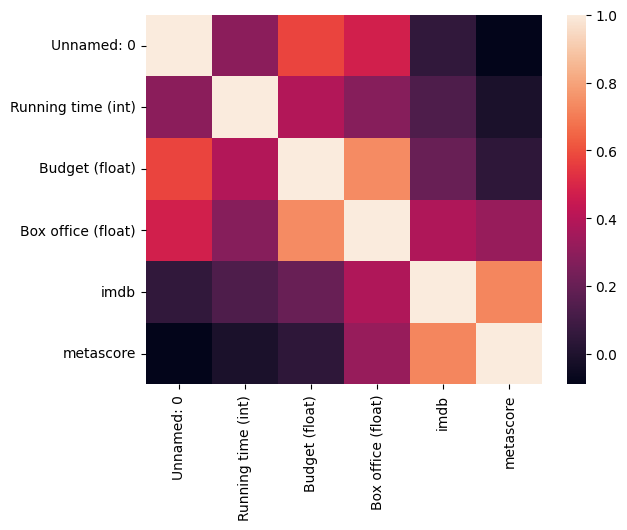

In [ ]:
import seaborn as sns
sns.heatmap(disney.corr())
sns.heatmap


# PLOTTING IN PYTHON

In this part of the section we’ll get to explore creating visualizations with **Matplotlib**!

In order to do this, we’ll need to first import the library, then tell it to show the graphs we make inside the notebooks (instead of opening in a separate window or program):

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

We’ll also set the size of the figure here:

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)

### Matplotlib Basic Syntax

**Line Plot**


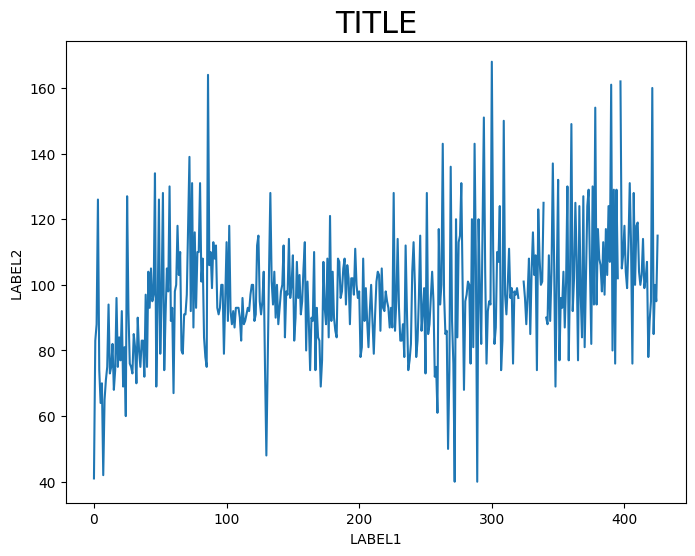

In [ ]:
plt.figure()
plt.plot(disney['Running time (int)'])
plt.xlabel('LABEL1')
plt.ylabel('LABEL2')
plt.title('TITLE', fontsize = 22)
plt.show()


**Scatterplot**

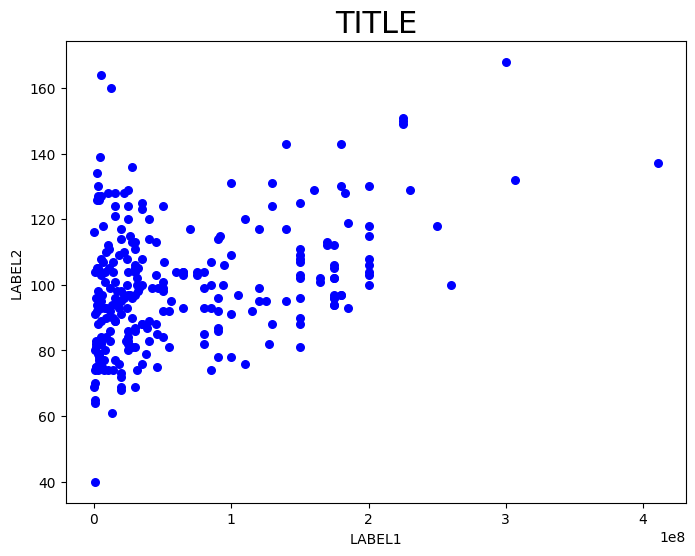

In [ ]:
plt.figure()
plt.scatter(disney['Budget (float)'], disney['Running time (int)'], color = 'BLUE', s = 30)
plt.xlabel('LABEL1')
plt.ylabel('LABEL2')
plt.title('TITLE', fontsize = 22)
plt.show()


**Histogram**

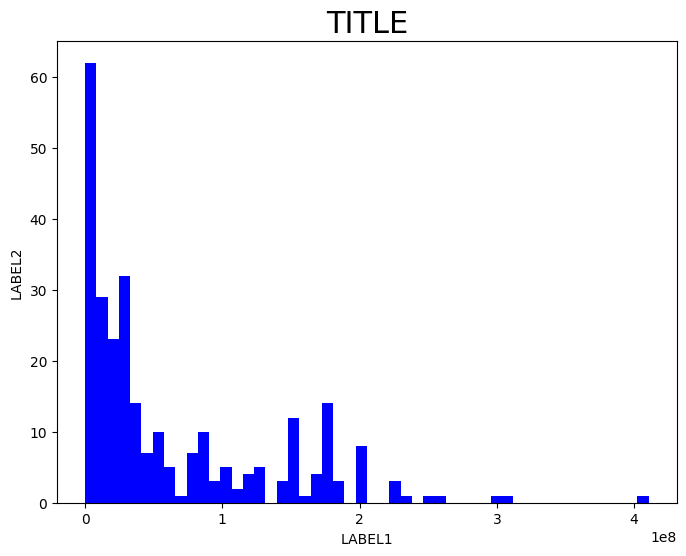

In [ ]:
plt.figure()
plt.hist(disney['Budget (float)'], bins = 50, color='BLUE')
plt.xlabel('LABEL1')
plt.ylabel('LABEL2')
plt.title('TITLE', fontsize = 22)
plt.show()

**Bar Chart**

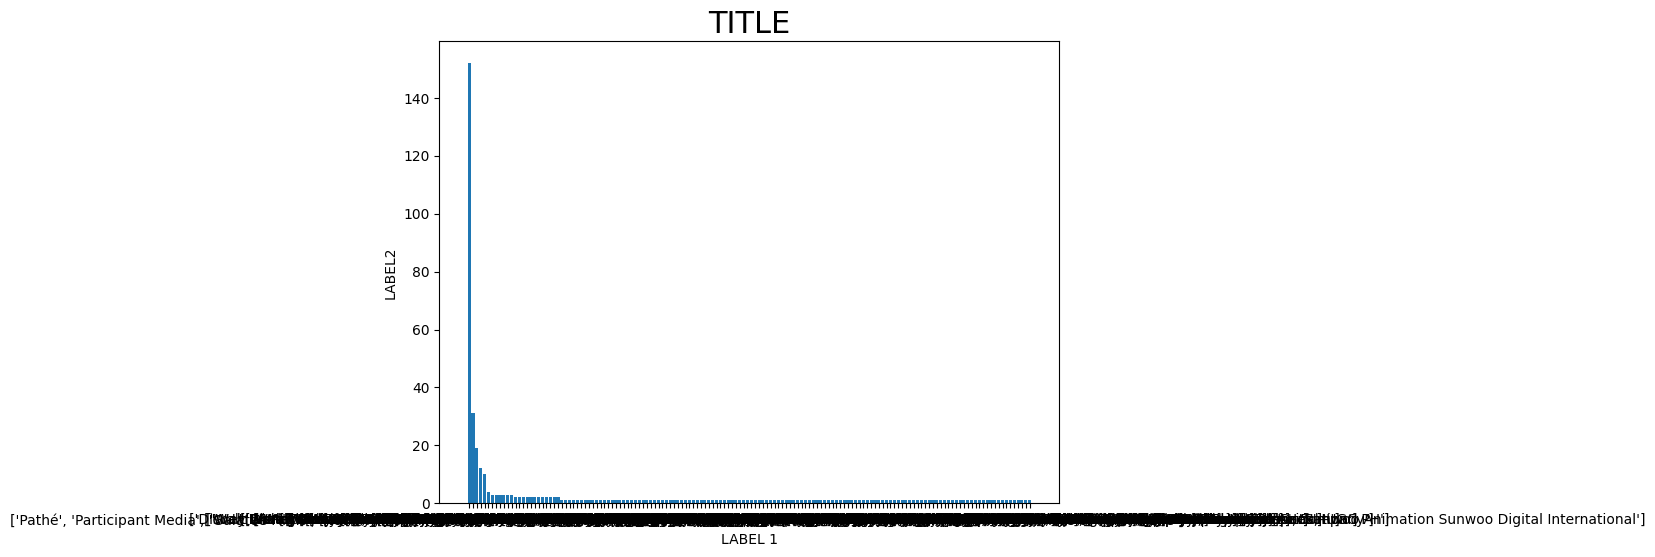

In [ ]:
plt.figure()
plt.bar(disney['Production company'].value_counts().index,
 disney['Production company'].value_counts().values)
plt.xlabel('LABEL 1')
plt.ylabel('LABEL2')
plt.title('TITLE', fontsize = 22)
plt.show()

For more in-depth explanation for each graph checkout the [Curriculum Page](https://datascience.kodewithklossy.com/13-final-project-data-cleaning-statistics) ◀ or this cheat sheet [HERE](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png) ◀